# JUVINI
## A Comprehensive graphing tool for EDA. Like a profiler using Graphs.

To install the package : 
`pip install juvini`

- **[Introduction](#introduction)** 
- **[Requirement](#requirement)**
- **[Usage](#usage)**
- **[Best Practices](#best-practices)**

## Introduction

Plotting graphs are one of the most important aspects of EDA. Graphs give intuitive insights because it is processed by our natural neural networks trained and evolved non stop for years. This tool is designed to allow data science users to work on plotting the graphs rather than spending time on codes to do it. This tool has several levels. Highest level is where the user just have to input the entire data frame and the code will take care of giving all plots based on the data type for all combinations. Just like the way pairplot works for numerical datatypes.

## Requirement

1. User should have some idea on python. This can be run from jupyter as well as python console
2. Should have good understanding of different graph types especially boxplot , scatterplot , barplot , countplot and distplot
3. This is not a must , but if the user has a clear understanding of the datatype associated with each column , then converting to the datatype will make the graph look better. For eg , if a column contains categorical value 1,2,3,4. Then it is better to convert it as object or category so that the tool will be able to guess it. Else it will assume the datatype as numeric and will plot for numeric related graphs
4. The tool will always treat first column as X axis , second input column as Y axis and if parameter `hue_col` is specified then it will search for this column on rest of the dataframe. 

## Usage

consider the standard IRIS dataset.Here we modified it a bit to add a numeric column rating where values are 0.1.2.3. Even though it is categorical , we have purposely kept it as numerical column to show some use cases that will come in later sections.
It consists of 5 columns
1. sepal_length - numeric
2. sepal_width - numeric
3. petal_length - numeric
4. petal_width - numeric
5. species - categorical 
6. rating - numeric ( in fact it is categorical in real scenario )

 
Sample output
1. sepal_length,sepal_width,petal_length,petal_width,species,rating
0. 5.1,3.5,1.4,0.2,setosa,1
1. 4.9,3.0,1.4,0.2,setosa,1
2. 4.7,3.2,1.3,0.2,setosa,0
3. 4.6,3.1,1.5,0.2,setosa,3
4. 5.0,3.6,1.4,0.2,setosa,0
5. 5.4,3.9,1.7,0.4,setosa,1
6. 4.6,3.4,1.4,0.3,setosa,3
7. 5.0,3.4,1.5,0.2,setosa,0
8. 4.4,2.9,1.4,0.2,setosa,1
9. 4.9,3.1,1.5,0.1,setosa,1
10. 5.4,3.7,1.5,0.2,setosa,0

### NUMERIC vs NUMERIC - to plot graph where two columns are numeric.
#### Method : `num_num(df[[num_col1,num_col2]])`
#### Examples
simple numeric to numeric plotting

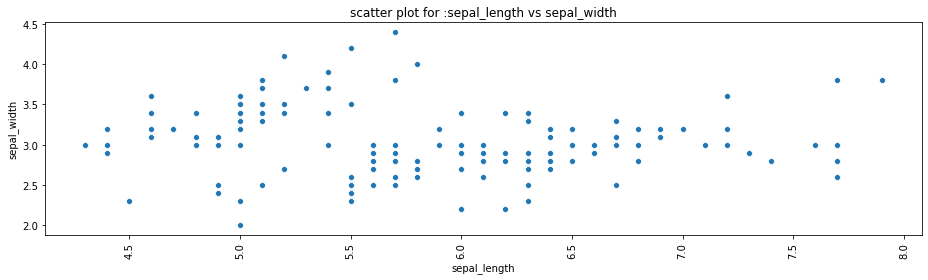

True

In [13]:
import pandas as pd
from juvini import num_num
df=pd.read_csv('iris_with_rating.csv')
num_num(df[['sepal_length','sepal_width']])

wait what if i want to add a hue parameter to it?
Just make sure to add the additional column `species` to the input dataframe and also add the parameter `hue_col='species'`

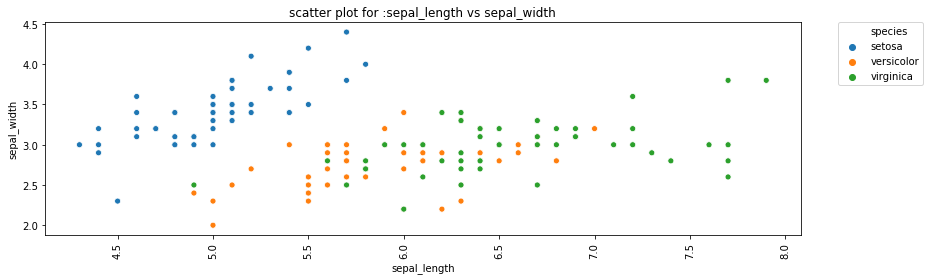

True

In [14]:
num_num(df[['sepal_length','sepal_width','species']],hue_col='species')

#### additional parameters 
1. x_name='xvalue' , the name that you want in x axis for the first column , sometimes the column name are different from the name you want to see in the graph.By default the first column name is taken
2. y_name='yvalue' , same as x_name , but for Y axis
3. size_figure=(13,4) , for playing around with the size. depending on size of the screen you may want to  change it. default is 13,4 with tight layout
4. hue_cols , to plot the hue. See the above example


### CATEGORICAL vs CATEGORICAL - to plot graph where two columns that are categorical.
#### Method : `cat_cat(df[[cat_col1,cat_col2]])`
#### Examples


This will take the top 5 categories for each column and plot it. You can change this value 5 using parameters `xcap` and `ycap` as mentioned below.
For each value of X , it will give the countplot for values in Y. 
Also the tool will take care of all subplots and figure size etc. User do not have to figure out the sizing and subplot grid size. 

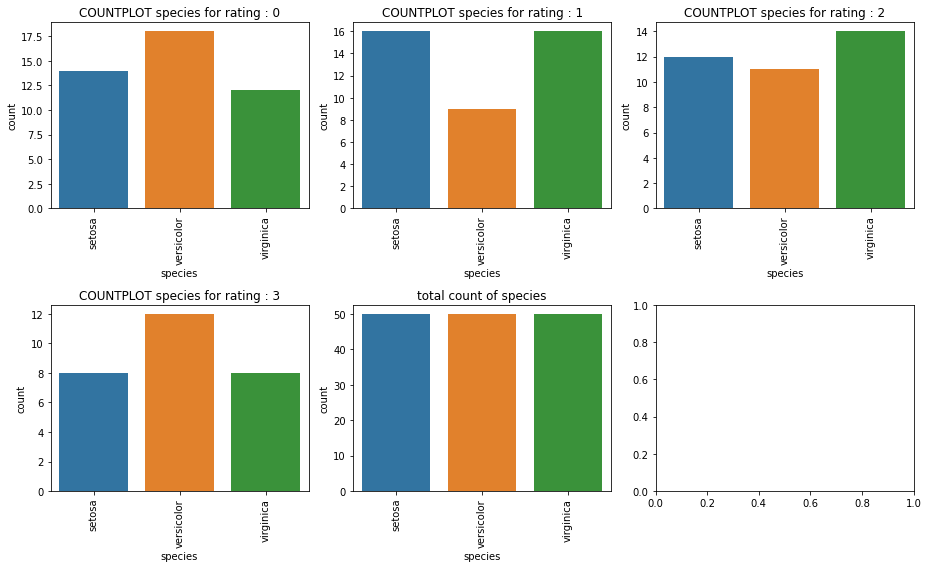

True

In [16]:
import pandas as pd
from juvini import cat_cat
df=pd.read_csv('iris_with_rating.csv')
cat_cat(df[['species','rating']])

similarly interchanging first and second column will change the axis
`cat_cat(df[['rating','species']])`

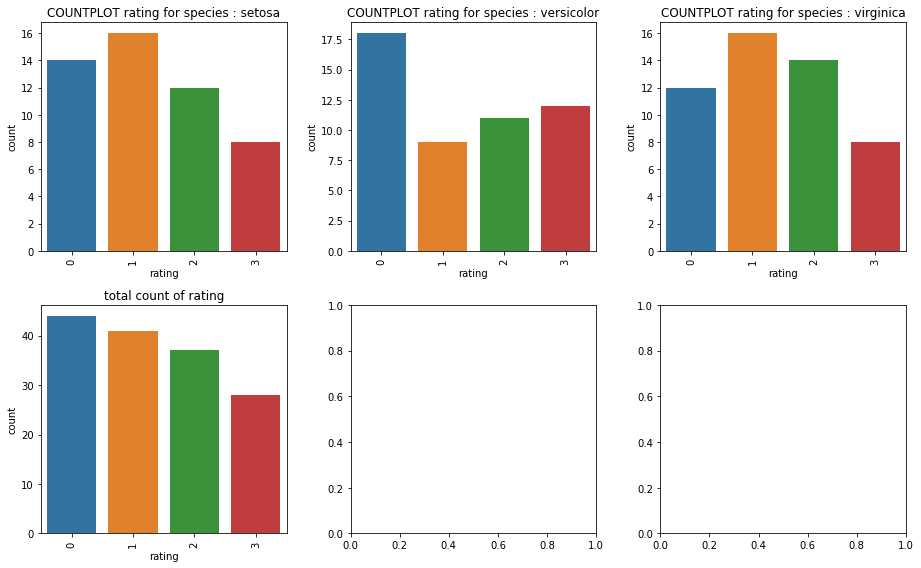

True

In [17]:
cat_cat(df[['rating','species']])

But wait , did we just use a numerical column to plot a categorical column?
Actually yes , if we know that it is categorical , we do not have to change the datatype and all unnecessary things. the code will take care of converting it to category.

Fine , but what if there are too many categories and i simply need to have a gist of top few categories?
Yes that is also supported , simply provide the parameter `xcap=<value>` , the code will sort the categories based on its count and choose the top n values based on the input.

#### additional parameters 
1. x_name='xvalue' , the name that you want in x axis for the first column , sometimes the column name are different from the name you want to see in the graph.By default the first column name is taken
2. y_name='yvalue' , same as x_name , but for Y axis
3. size_figure=(13,4) , for playing around with the size. depending on size of the screen you may want to  change it. default is 13,4 with tight layout
4. xcap=5 , will cap the maximum categories with top 5 based on its count for x axis 1st column , default 5
5. ycap=5 , same as xcap , but will be applicable to y column.
6. hue_cols , to plot the hue. See the above example
7. scols=3 , this is an experimental feature , use with caution. This parameter will control how many plots in one row. By default it is 3
7. others=True , this is an experimental feature , use with caution. This parameter will put all the other values that are not coming in the top values provided into a category called 'restall'

### CATEGORICAL vs NUMERICAL - to plot graph where two columns where x is category and y is numeric.
#### Method : `cat_num(df[[cat_col1,num_col2]])`
#### Examples

This will take the top 5 categories of categorical column and plot numerical. You can change this value 5 using parameters `xcap` and `ycap` as mentioned below.
For each value of X , it will give the boxplot corresponding to the numerical column in that. Additionally it will also give aggregate sum of the numerical values for each category.

It is upto the user to decide which is useful. Boxplot is always useful , whereas the sum aggregate might help if you are looking at something like total votes etc. but if it is like sepal_width kind , then it may not be useful.Anyways no harm in giving both.

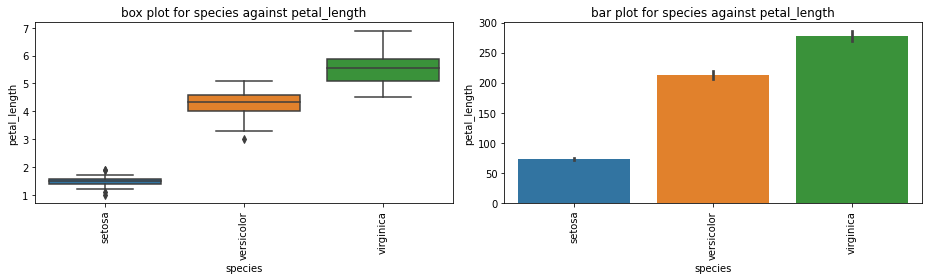

True

In [18]:
import pandas as pd
from juvini import cat_num
df=pd.read_csv('iris_with_rating.csv')
cat_num(df[['species','petal_length']])

Can we use a numerical column to plot a categorical column?
Actually yes , if we know that it is categorical , we do not have to change the datatype and all unnecessary things. the code will take care of converting it to category as long as you provide the column as first column in the input

Fine , but what if there are too many categories and i simply need to have a gist of top few categories?
Yes that is also supported , simply provide the parameter `xcap=<value>` , the code will sort the categories based on its count and choose the top n values based on the input.


How about the hue?
Yes , that also will work here. provide it like

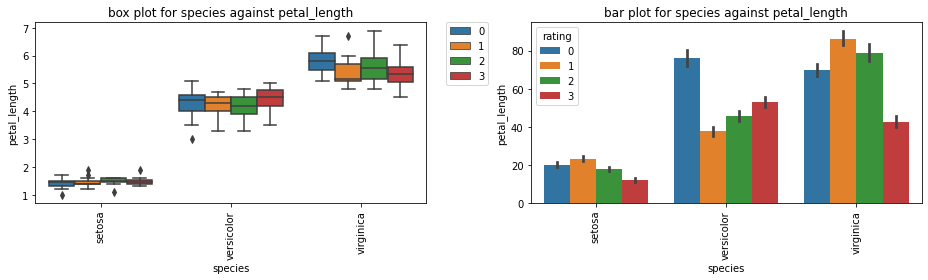

True

In [19]:
cat_num(df[['species','petal_length','rating']],hue_col='rating')

#### additional parameters 
1. x_name='xvalue' , the name that you want in x axis for the first column , sometimes the column name are different from the name you want to see in the graph.By default the first column name is taken
2. y_name='yvalue' , same as x_name , but for Y axis
3. size_figure=(13,4) , for playing around with the size. depending on size of the screen you may want to  change it. default is 13,4 with tight layout
4. xcap=5 , will cap the maximum categories with top 5 based on its count for x axis 1st column , default 5
6. hue_cols , to plot the hue. See the above example
7. others=True , this is an experimental feature , use with caution. This parameter will put all the other values that are not coming in the top values provided into a category called 'restall'. There are ratings 0-3. If we cap it to only top 2. Then the rest of the ratings will go into "restall" value.

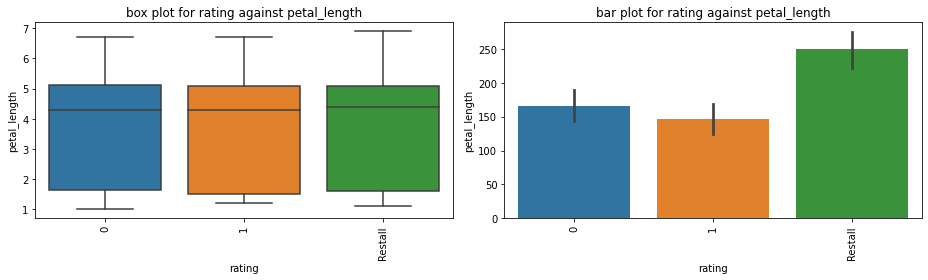

True

In [20]:
cat_num(df[['rating','petal_length']],xcap=2,others=True)


### Single NUMERICAL - to plot graph with just a numerical column
#### Method : `single_num(df[[num_col1]])`
#### Examples

It is not always the case that plot will need two columns. What if i just need to see a boxplot of a numeric column or the distribution of a numeric column?
For that we have the method which will give boxplot and distplot. It is usually used with the hue to give more insights

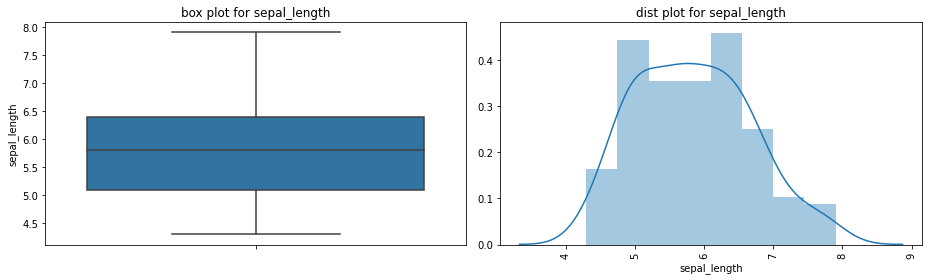

True

In [22]:
import pandas as pd
from juvini import single_num
df=pd.read_csv('iris_with_rating.csv')
single_num(df[['sepal_length']])

How about the hue?
Yes , that also will work here. provide it like

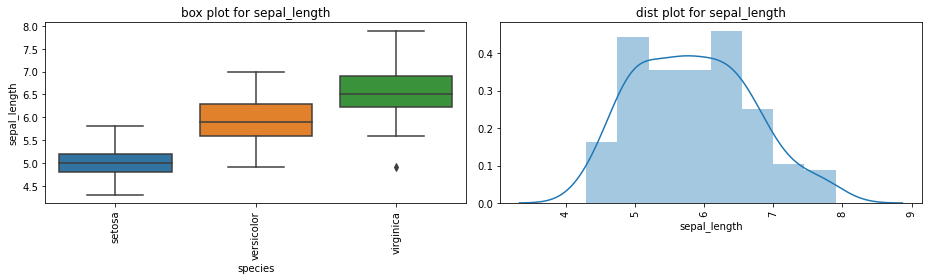

True

In [23]:
single_num(df[['sepal_length','species']],hue_col='species')

#### additional parameters 
1. x_name='xvalue' , the name that you want in x axis for the first column , sometimes the column name are different from the name you want to see in the graph.By default the first column name is taken
2. size_figure=(13,4) , for playing around with the size. depending on size of the screen you may want to  change it. default is 13,4 with tight layout
3. hue_cols , to plot the hue. See the above example

### Single CATEGORICAL - to plot graph with just a categorical column
#### Method : `single_cat(df[[cat_col1]])`
#### Examples

It is not always the case that plot will need two columns. What if i just need to see a boxplot of a categorical column or the distribution of a numeric column?
For that we have the method which will give boxplot and distplot. It is usually used with the hue to give more insights

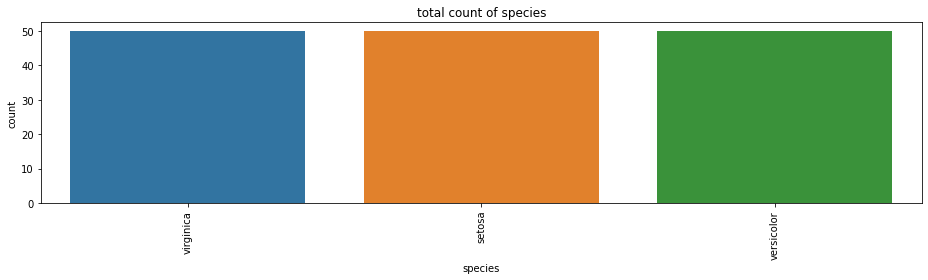

True

In [25]:
import pandas as pd
from juvini import single_cat
df=pd.read_csv('iris_with_rating.csv')
single_cat(df[['species']])

Can we use a numerical column to plot a categorical column?
Actually yes , if we know that it is categorical , we do not have to change the datatype and all unnecessary things. the code will take care of converting it to category as long as you provide the column as first column in the input

Fine , but what if there are too many categories and i simply need to have a gist of top few categories?
Yes that is also supported , simply provide the parameter `xcap=<value>` , the code will sort the categories based on its count and choose the top n values based on the input.

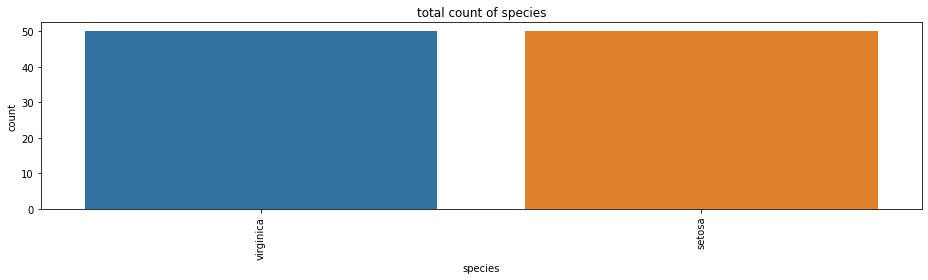

True

In [31]:
single_cat(df[['species']],xcap=2)

Fine , what if i want to change not the xcap but the ycap?
Yes we can do that as well. Simply change the parameter `ycap=<value>` just like the xcap.

How about the hue?
Yes , that also will work here. provide it like `single_cat(df[['species','hue_column']],hue_col='hue_column)`

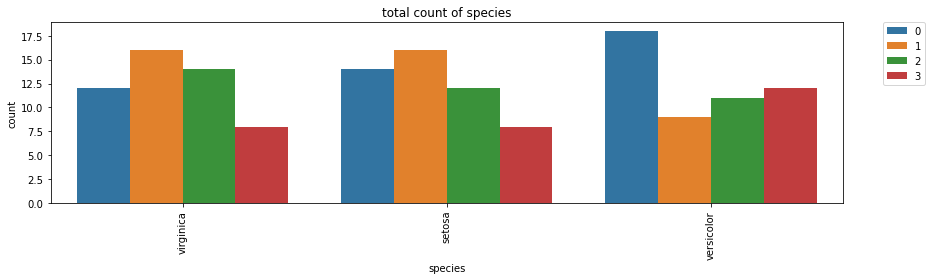

True

In [33]:
single_cat(df[['species','rating']],hue_col='rating')

#### additional parameters 
1. x_name='xvalue' , the name that you want in x axis for the first column , sometimes the column name are different from the name you want to see in the graph.By default the first column name is taken
2. size_figure=(13,4) , for playing around with the size. depending on size of the screen you may want to  change it. default is 13,4 with tight layout
3. hue_cols , to plot the hue. See the above example
4. xcap=5 , will cap the maximum categories with top 5 based on its count for x axis 1st column , default 5

## To make it more easier
#### Method : `xy_autoplot(df[[col1,col2]])`
#### Examples
What if i do not even care what the data type is. I just want the code to decide it based on the data type already present.Can i do that?

Yes. There is a method which does exactly this. You will have to simply give two columns. The first column will be taken as X variable and second as Y variable. And based on the data type it will provide you the necessary graph.


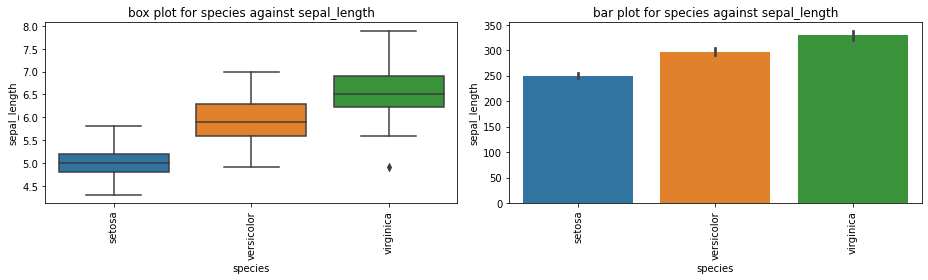

True

In [35]:
import pandas as pd
from juvini import xy_auto_plot
df=pd.read_csv('iris_with_rating.csv')
xy_auto_plot(df[['sepal_length','species']])

Does it support hue?
Yes , you can use the same parameter `hue_col=<colname>` and if the graph can handle hue , then it will use it.

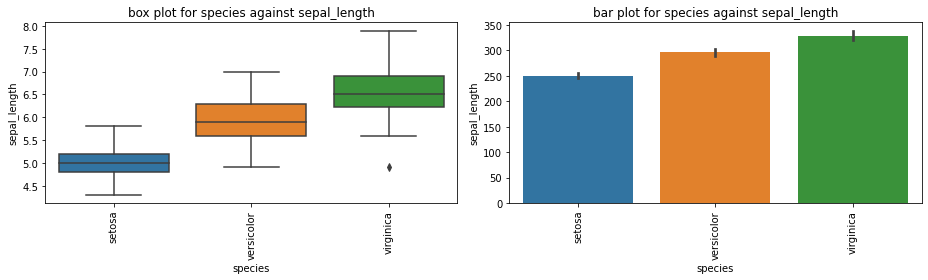

True

In [48]:
xy_auto_plot(df[['sepal_length','species']],hue='rating')

So, what is the problem , why then go through all the above graphs if this will take care of all.

Not exactly!! . The rating column is numeric. But it contains only categorical values. In such cases the code will not be able to identify and the plot may not look good. So it is always useful to have the breakdown of charts to more specific details. Apart from that , i do not see any issues in using autoplot as long as the very purpose of all this is to make life easier for data scientists.


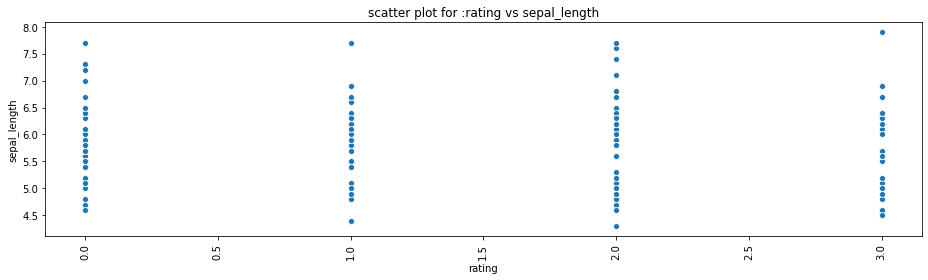

True

In [41]:
xy_auto_plot(df[['rating','sepal_length']])

compare it with the `num_cat()` if we force rating as categorical. You see the difference? 

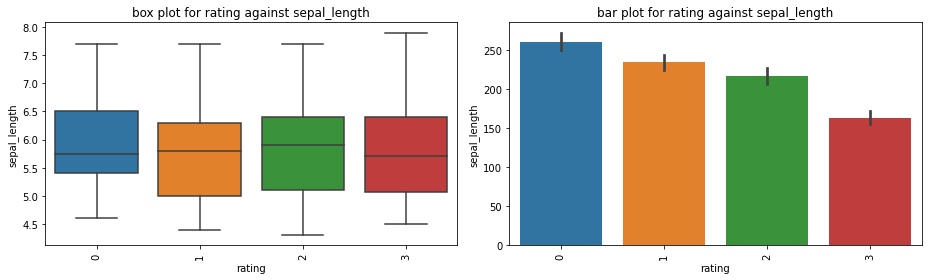

True

In [43]:
cat_num(df[['rating','sepal_length']])

## Still better and most comfortable
#### Method : `juvini_profile(df[[list_of_cols]])`
#### Examples
This is the highest of all that combines all below features and give the entire story in a matter of one command.

Numerical columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'rating']
Categorical columns: []
Analysis of numeric sepal_length and numeric sepal_length


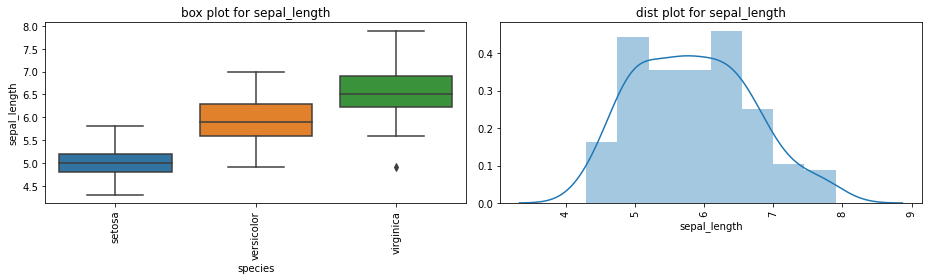

Analysis of numeric sepal_length and numeric sepal_width


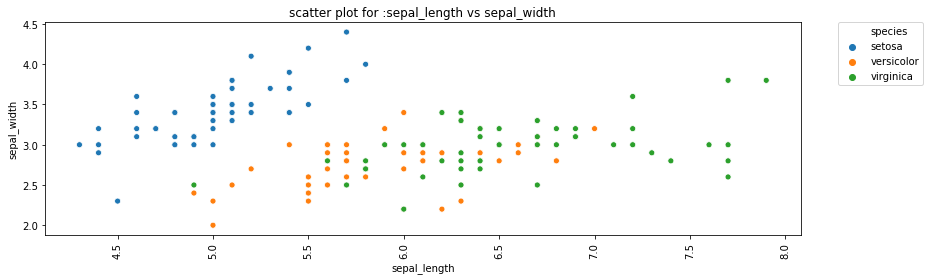

Analysis of numeric sepal_length and numeric petal_length


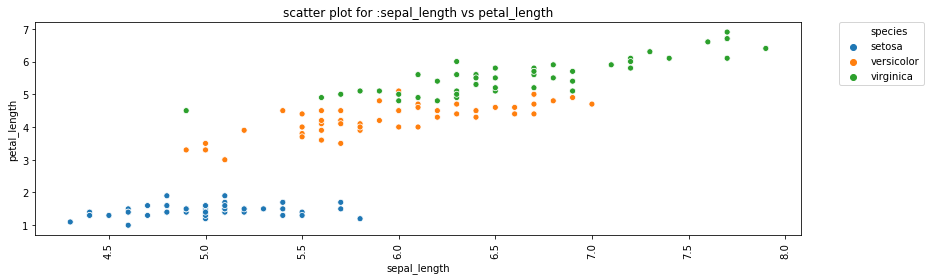

Analysis of numeric sepal_length and numeric petal_width


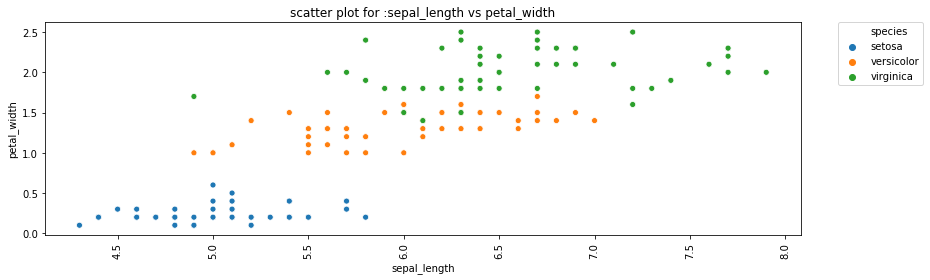

Analysis of numeric sepal_length and numeric rating


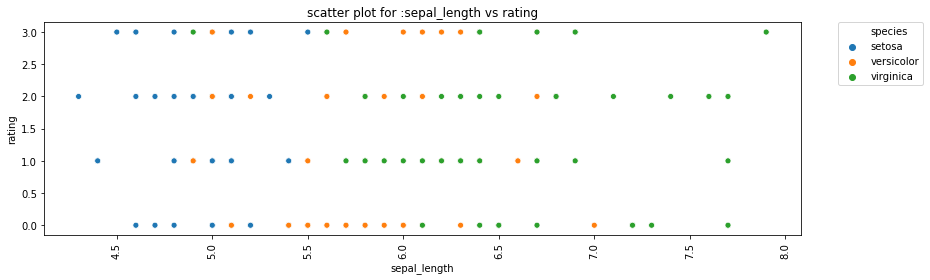

Analysis of numeric sepal_width and numeric sepal_width


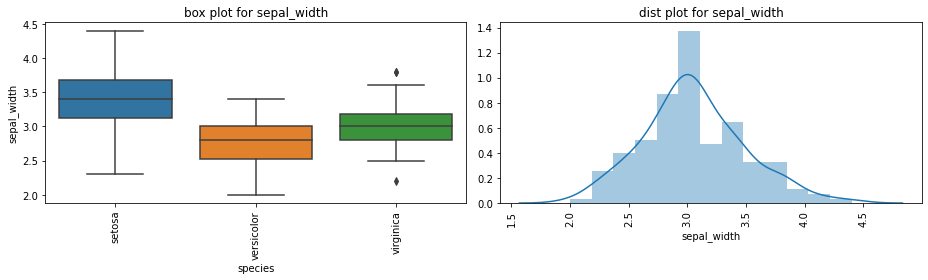

Analysis of numeric sepal_width and numeric petal_length


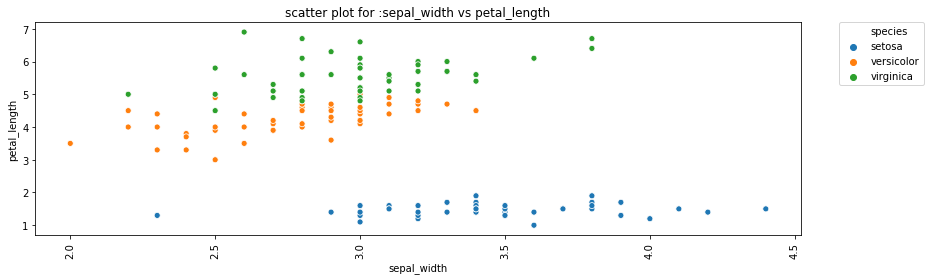

Analysis of numeric sepal_width and numeric petal_width


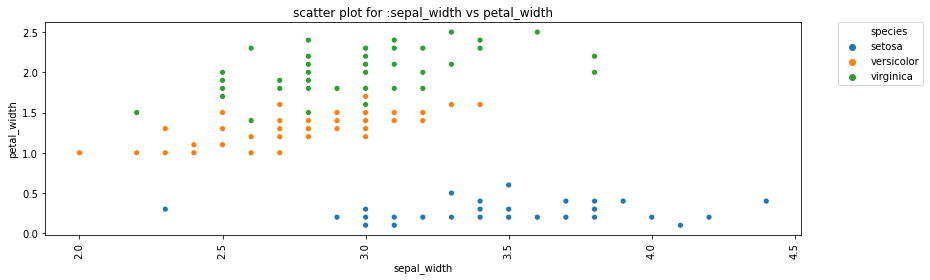

Analysis of numeric sepal_width and numeric rating


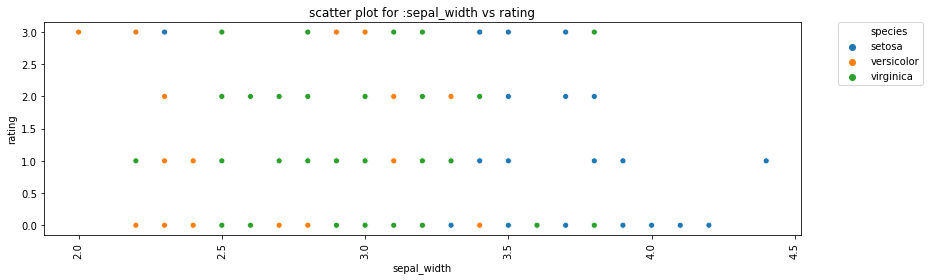

Analysis of numeric petal_length and numeric petal_length


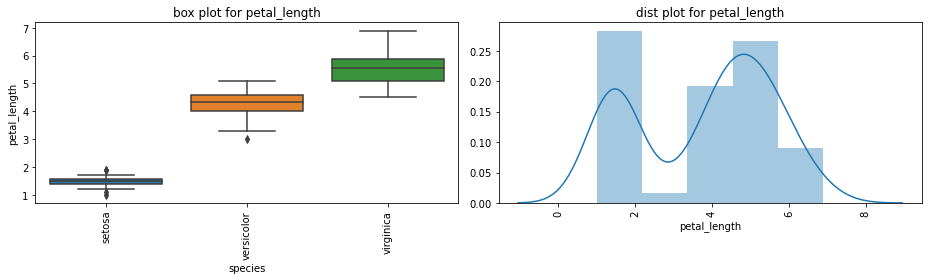

Analysis of numeric petal_length and numeric petal_width


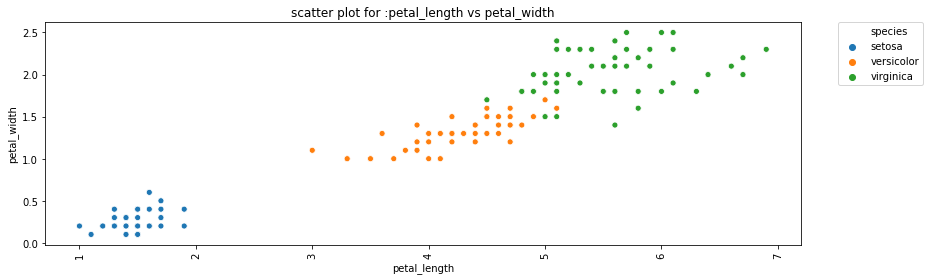

Analysis of numeric petal_length and numeric rating


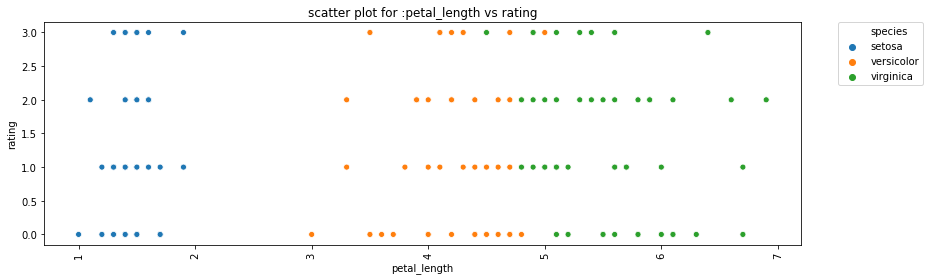

Analysis of numeric petal_width and numeric petal_width


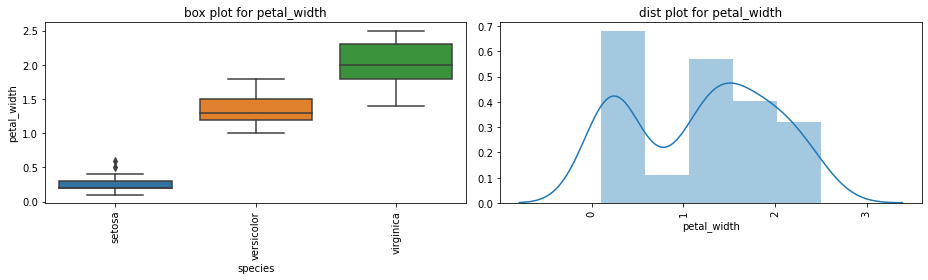

Analysis of numeric petal_width and numeric rating


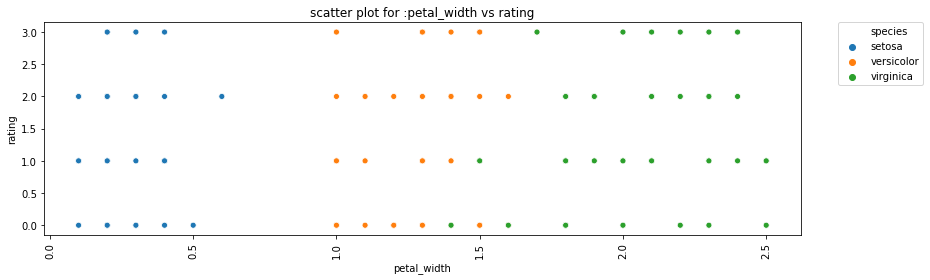

Analysis of numeric rating and numeric rating


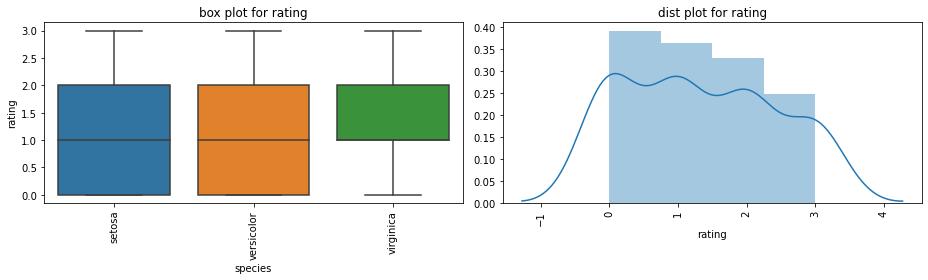

True

In [44]:
import pandas as pd
from juvini import juvini_profile
df=pd.read_csv('iris_with_rating.csv')
juvini_profile(df,hue_col='species')

#### An easier way to get the only related graphs to the dependent variable
In many cases we may not need all sorts of graph but rather interested in seeing the graph related to the target variable, to do that simpy 
run a loop using xy_auto_graph with dependent and independent variable

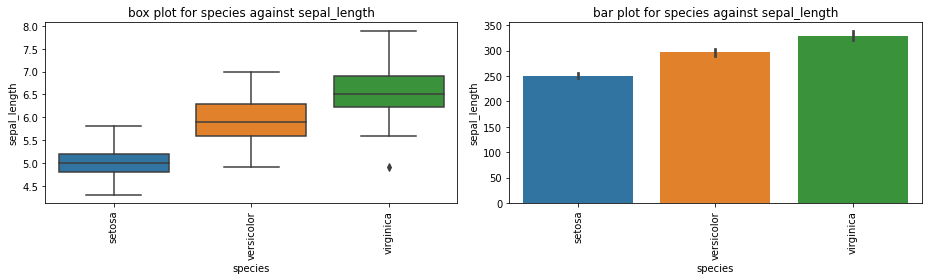

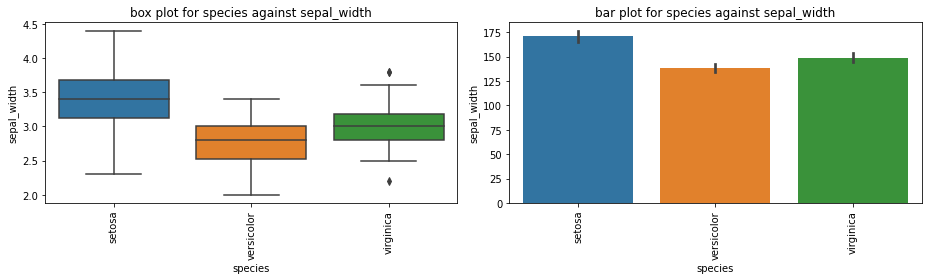

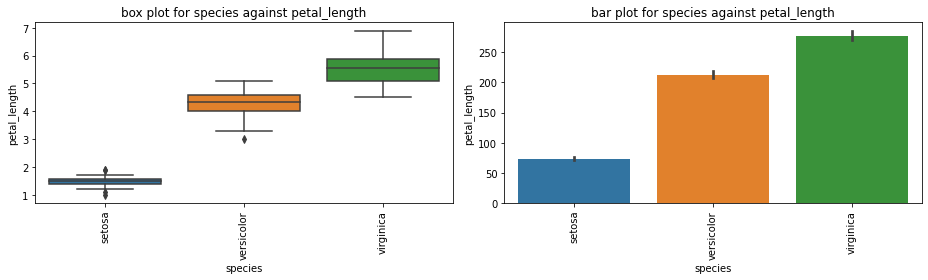

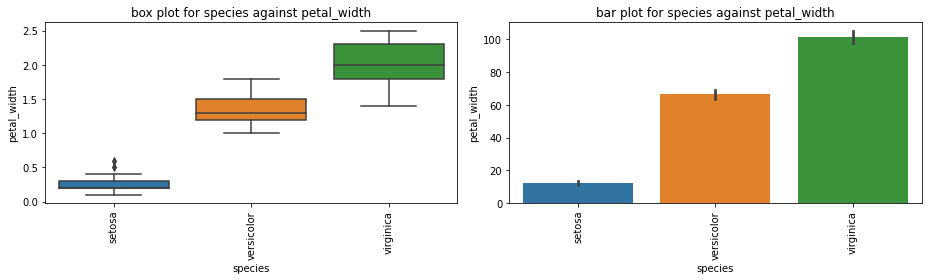

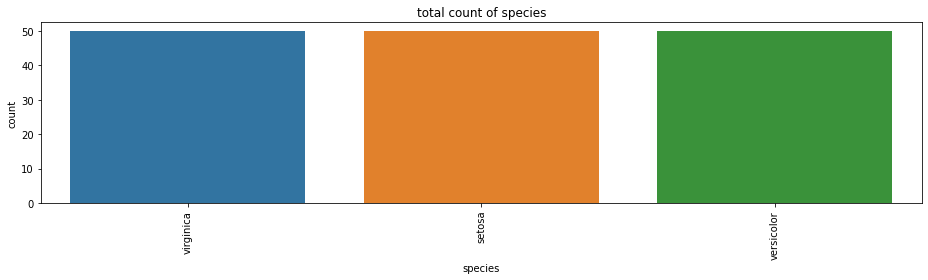

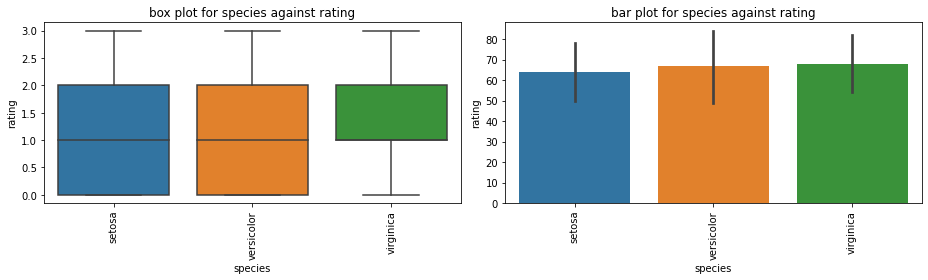

In [47]:
import pandas as pd
from juvini import juvini_profile
df=pd.read_csv('iris_with_rating.csv')
for col in df.columns:
    xy_auto_plot(df[[col,'species']])